# <span style="color:blue">Workshop 3: Multi-objective evolution</span>

Simon O'Keefe: simon.okeefe@york.ac.uk

Danny Roberts: danny.roberts@york.ac.uk

Tianda Sun: tianda.sun@york.ac.uk

# <span style="color:blue">Learning Objectives</span>

* Implement individuals with different representations to lists
* Implement and then examine multi-objective evolution
* Implement the Mu Plus Lamda algorithm manually, as needed for NGSA II

# <span style="color:blue">The problem: the kursawe function</span>

The Kursawe function has two objectives that we will look to minimize. It can have an arbirtarly number of input variables, which take values within the range -5 and 5.

<img src="equation.png" alt="Kursawe equation" width = 500>

<img src="plot.png" alt="Kursawe plot" width = 500>

There are built-in benchmark problems in DEAP. You import them like this: 

In [22]:
from deap import benchmarks

The kursawe function can be called like this:

In [23]:
exampleInputs = [-5,2,5]
benchmarks.kursawe(exampleInputs)

(-6.812092298638419, 13.935688996486114)

# <span style="color:blue">Exercise 1: Implement a multi objective GA for the kursawe function</span>

Create a GA that gives inputs that minimize the multi-objective function. For this, the number of inputs to use should be 3 to start with (which you can visualize). Then try changing it to 5.

## <span style="color:blue">GA Code Here</span>

In [94]:
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import random

In [95]:
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)

/Users/tom/.asdf/installs/python/3.10.9/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/tom/.asdf/installs/python/3.10.9/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [96]:
IND_SIZE=3

def rand_float_range():
    return random.uniform(-5, 5)

toolbox = base.Toolbox()
toolbox.register("attr_float", rand_float_range)

toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_float, n=IND_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [97]:
def eval_kursawe(ind):
    return benchmarks.kursawe(ind)

toolbox.register("evaluate", eval_kursawe)

In [98]:
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.4, indpb=0.2)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("select", tools.selTournament, tournsize=3)
pop = toolbox.population(n=20)

In [99]:
def pareto_eq(ind1, ind2):
    return np.allclose(ind1.fitness.values, ind2.fitness.values)

In [100]:
NGEN = 500
popSize = MU = 200
LAMBDA = 400 # number of offspring to produce at each generation
CXPB = 0.5 # probability of mating two individuals
MUTPB = 0.2 # probability of mutating an individual


In [101]:
pop = toolbox.population(n=popSize)
hof = tools.ParetoFront(similar=pareto_eq)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

In [102]:
pop, log = algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats, halloffame=hof)

gen	nevals	avg                      	std                    	min                        	max                      
0  	200   	[-9.71915794  5.58416349]	[2.45429642 6.15527843]	[-18.60284609  -6.77195957]	[-5.51708325 20.55661415]
1  	266   	[-11.57446606   4.61564956]	[2.09599575 6.13976886]	[-18.60284609  -9.68300534]	[-7.21423221 18.00761902]
2  	285   	[-13.56555436   2.04869048]	[2.09088277 6.10593424]	[-19.91385405  -9.68300534]	[-9.13405971 18.22136848]
3  	271   	[-15.09707445   2.30124367]	[1.78925195 5.9958075 ]	[-19.91385405 -10.08156196]	[-11.73959839  18.22136848]
4  	273   	[-16.48150753   0.36741889]	[1.35911272 3.911101  ]	[-19.91385405  -6.93725666]	[-13.34900873  11.61702037]
5  	277   	[-17.64850197   0.42998578]	[0.94961892 2.86185836]	[-19.91385405  -6.93725666]	[-14.6149398    7.22325179]
6  	271   	[-18.26700701   0.67399541]	[0.73004091 1.91451668]	[-19.91385405  -6.88590572]	[-15.97363383   6.82423006]
7  	286   	[-18.87115065   0.60829865]	[0.57679952 0.8670677

In [103]:
eval_kursawe(best_ind)

(-39.997398854743665, 0.004218734893633521)

## <span style="color:blue">Plot the results</span>

Be sure to plot the pareto front at the end. This is possible with the 3 arguments version of this problem. You can plot using a 3D plot in Seaborn. e.g.

```import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel("Obj1")
ax.set_ylabel("Obj2")
ax.set_zlabel("Obj3")
ax.scatter(x, y, z)```

You can also plot fitness in 2D using:

```sns.kdeplot(x,y)```

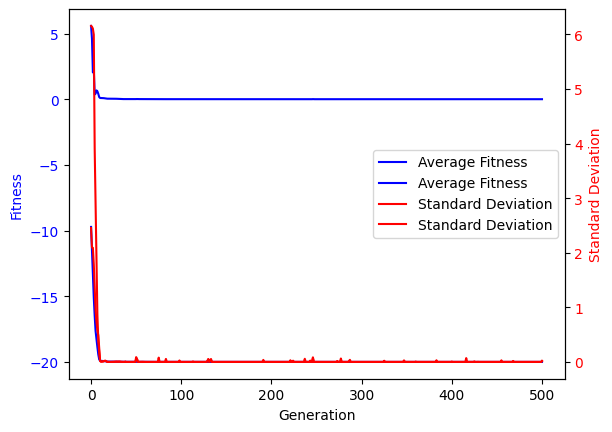

In [104]:
gen = log.select("gen")
avgs = log.select("avg")
stds = log.select("std")


fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, avgs, "b-", label="Average Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, stds, "r-", label="Standard Deviation")
ax2.set_ylabel("Standard Deviation", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lines = line1 + line2
labs = [l.get_label() for l in lines]
ax1.legend(lines, labs, loc="center right")

plt.show()

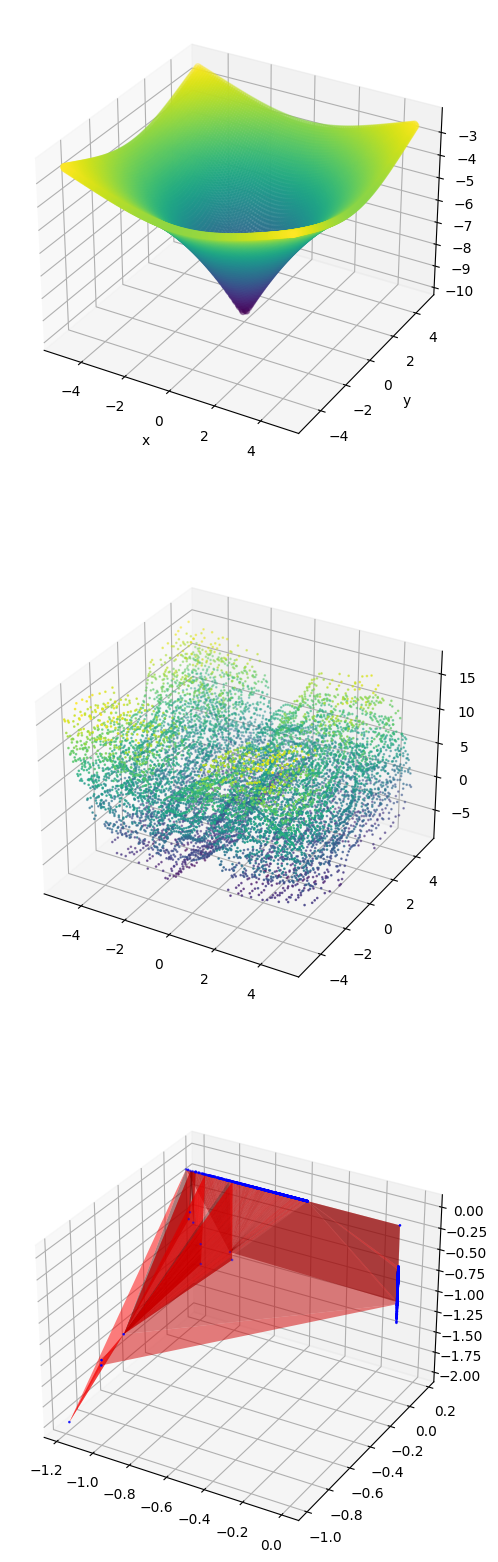

In [124]:
# np.tile(np.arange(0, 10, 0.1), (3, 1))
from mpl_toolkits.mplot3d import Axes3D
from itertools import permutations
import numpy as np
from deap import benchmarks
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

coords = list(permutations(np.arange(-5, 5,0.1), r=2))
kursawe = [benchmarks.kursawe((x,y)) for x,y in coords]
kursawe1, kursawe2 = zip(*kursawe)

fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(311, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')

kursawe1_coords = [(c[0], c[1], k) for c,k in zip(coords, kursawe1)]
kursawe2_coords = [(c[0], c[1], k) for c,k in zip(coords, kursawe2)]

ax.scatter(*zip(*kursawe1_coords), c=kursawe1, cmap='viridis');

ax = fig.add_subplot(312, projection='3d')
ax.scatter(*zip(*kursawe2_coords), c=kursawe2, cmap='viridis', s=0.8);


ax = fig.add_subplot(313, projection='3d')
# hof_karsawe1, hof_karsawe2 = zip(*list(map(benchmarks.kursawe, hof)))
hofxs, hofys, hofzs = zip(*hof)
triang = mtri.Triangulation(hofxs, hofys)
ax.plot_trisurf(triang, hofzs, color='red', alpha=0.5)
ax.scatter(hofxs, hofys, hofzs, c='blue', s=0.8);


# <span style="color:blue">Exercise 2: Manually Implement the Mu Plus Lambda Algorithm</span>

Based on the walkthough, you probably used the built-in Mu Plus Lambda algorothm from DEAP to implement your algorithm. Implementing an EA in this way is important for NGSA II because it ultimately selects from both the parent and a child population together. Mu plus Lamda is technically an **Evolutionary Strategy algorithm**, rather than a Genetic Algorithm, because children are produced before selection. This means you need to generate a child population first. For this, no selection is used. Instead we create a population of offspring by either replicating a parent, crossing over two parents, or replicating and then mutating a parent. These populations are then combined for selection.

You can read more about the MuPlusLamnda algorithm here:
https://deap.readthedocs.io/en/master/api/algo.html

To produce the offspring we can use the DEAP function algorithms.VarOR
https://deap.readthedocs.io/en/master/api/algo.html#deap.algorithms.varOr

*(Note: The VarAnd function is also available and is a shortcut to the approach you have been manually coding before, where you perform crossover and mutation with given probabilities).*

Pseudocode for the algorithm looks like this:

```
evaluate(population)
for g in range(ngen):    
    offspring = varOr(population, toolbox, lambda_, cxpb, mutpb)
    evaluate(offspring)
    population = select(population + offspring, mu)```

**Your task:** Implement this algorithm yourself instead of using the built-in algorithm. You will also need to update the Pareto HoF manually using hof.update(pop)

In [134]:
# pop, log = algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats, halloffame=hof)
def varOr(pop, toolbox, lambda_, cxpb, mutpb) -> list:
    children = []
    count = 0
    while len(children) < lambda_:
        if count % 3 == 0:
            if random.random() < cxpb:
                i1, i2 = random.sample(range(len(pop)), 2) # returns index
                child, _ = toolbox.mate(pop[i1], pop[i2])
                del child.fitness.values
                children.append(child)
        elif count % 3 == 1:
            if random.random() < mutpb:
                i = random.choice(pop) # return individual
                child, = toolbox.mutate(i)
                del child.fitness.values
                children.append(child)
        else:
            child = random.choice(pop)
            del child.fitness.values
            children.append(toolbox.clone(child))
        count += 1
    return children


def eaMuPlusLambda(pop, toolbox, mu, lambda_, cxpb, mutpb, ngen, stats, halloffame=None) -> tuple:
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + stats.fields

    for i in range(ngen):
        offspring = varOr(pop, toolbox, lambda_, cxpb, mutpb)
        for ind in offspring:
            ind.fitness.values = toolbox.evaluate(ind)

        if halloffame is not None:
            halloffame.update(offspring)

        pop[:] = toolbox.select(pop + offspring, mu)
        # record = stats.compile(pop)
        # logbook.record(gen=i, nevals=len(offspring), **record)
    return pop, logbook

pop = toolbox.population(n=popSize)
hof = tools.ParetoFront(similar=pareto_eq)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)
pop, log = eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats, halloffame=hof)

In [137]:
best_ind = tools.selBest(pop, 1)[0]
benchmarks.kursawe(best_ind)

(-19.99876451593763, 0.003451557336488443)

# <span style="color:blue">Optional Exercise 3: Implement the knapsack problem using a list or numpy array instead of set</span>

To get you more used to inheriting from different data types for individuals, **your task** is to implement the knapsack problem from the accompanying walkthrough, but represent individuals with a Python dict rather than a set.  This will also require changing the mutation and crossover functions. Allow mutation to remove items from anywhere in the bag, rather than just pop from the top.

Important: If you want to use a numpy array, you must read this first:
https://deap.readthedocs.io/en/master/tutorials/advanced/numpy.html
And for an example see this:
https://deap.readthedocs.io/en/master/examples/ga_onemax_numpy.html?highlight=numpy